# Описание
Данный алгоритм тестировался только на американских акций, без учета российских.

# Imports

In [1]:
import csv
import cProfile
import operator
from itertools import zip_longest
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from mpl_finance import candlestick2_ohlc 
# %run tinkoff_connection.ipynb
import psutil
# from IPython.core.display import display, HTML
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\ogurskiy\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
#!/usr/bin/env python

# gives a single float value
psutil.cpu_percent()
# gives an object with many fields
psutil.virtual_memory()
# you can convert that object to a dictionary 
dict(psutil.virtual_memory()._asdict())

{'total': 8121290752,
 'available': 2124730368,
 'percent': 73.8,
 'used': 5996560384,
 'free': 2124730368}

In [ ]:
del data_miss

# Вызовы общих функций

## Запись в csv

In [ ]:
def pretrain_df():
    """Функция для подготовки данных для алгоритма, использующего датафреймы в качестве табилиц (удобно, но медленно)"""
    %run tinkoff_connection.ipynb
#     df_sh = get_stocks() # Получение полной(сектор, figi и тд) информации по акциям онлайн
#     get_stocks_to_CSV(df_sh) # Запись полной(сектор, figi и тд) информации по акциям в .CSV

    stocks_info = get_stocksinfo_from_CSV() # Получение полной(сектор, figi и тд) информации по всем тикера ОФФЛАЙН

#     date_from = datetime.datetime(1921, 1, 10)
#     date_to = datetime.datetime(2022, 4, 30)
    usd_stocks, rub_stocks = rub_usd(stocks_info) # Разделение списка акций на российские и иностранные
    print('stocks_list_all')
    stocks_list_all = list(usd_stocks.loc[:,'Ticker']) #Список тикеров интересующих акций
    usd_stocks.columns = ['FIGI', 'Ticker', 'Class_code', 'Isin', 'Lot', 'Currency',
                          'Klong', 'Kshort', 'Dlong', 'Dshort', 'Dlong_min', 'Dshort_min', 
                          'Short_enabled_flag', 'Name', 'Exchange', 'Ipo_date', 'Issue_size', 
                          'Country_of_risk', 'Country_of_risk_name', 'Sector', 'Issue_size_plan',
                          'Nominal', 'Trading_status', 'Otc_flag', 'Buy_available_flag', 'Sell_available_flag',
                          'Div_yield_flag', 'Share_type', 'Min_price_increment', 'Api_trade_available_flag']
    print('create_stocks_dict_full')
    stocks_dict_full_all = create_stocks_dict_full(stocks_list_all, # создание словаря с выбранными акциями онлайн
                                                       usd_stocks, 
                                                       1, #add_corr_N
                                                       1997) # С какого года начинать

        
    quotes_to_csv(stocks_dict_full_all, 'dict_stocks_23062022') # Запись котировок акций в .CSV

#     stocks_dict_full_csv = quotes_from_csv() # Получения словаря акций, где ключ - тикер, а значение - ДФ котировок
#     usd_stocks, rub_stocks = rub_usd(stocks_info) # Разделение списка акций на российские и иностранные
#     stocks_list_all = list(usd_stocks.loc[:,'Ticker']) #Список тикеров интересующих акций

#     return error_ticker
#     return  stocks_info, stocks_dict_full_csv, usd_stocks

# pretrain_df()
# stocks_info, stocks_dict_full_csv_big, usd_stocks = pretrain_df()

## Импорт из csv

In [10]:
def pretrain_df():
    """Функция для подготовки данных для алгоритма, использующего датафреймы в качестве табилиц (удобно, но медленно)"""
    %run tinkoff_connection.ipynb
    import warnings
#     df_sh = get_stocks() # Получение полной(сектор, figi и тд) информации по акциям онлайн
#     get_stocks_to_CSV(df_sh) # Запись полной(сектор, figi и тд) информации по акциям в .CSV

    stocks_info = get_stocksinfo_from_CSV() # Получение полной(сектор, figi и тд) информации по всем тикера ОФФЛАЙН

#     date_from = datetime.datetime(1921, 1, 10)
#     date_to = datetime.datetime(2022, 4, 30)
    usd_stocks, rub_stocks = rub_usd(stocks_info) # Разделение списка акций на российские и иностранные
#     print('stocks_list_all')
#     stocks_list_all = list(usd_stocks.loc[:,'Ticker']) #Список тикеров интересующих акций
#     usd_stocks.columns = ['FIGI', 'Ticker', 'Class_code', 'Isin', 'Lot', 'Currency',
#                           'Klong', 'Kshort', 'Dlong', 'Dshort', 'Dlong_min', 'Dshort_min', 
#                           'Short_enabled_flag', 'Name', 'Exchange', 'Ipo_date', 'Issue_size', 
#                           'Country_of_risk', 'Country_of_risk_name', 'Sector', 'Issue_size_plan',
#                           'Nominal', 'Trading_status', 'Otc_flag', 'Buy_available_flag', 'Sell_available_flag',
#                           'Div_yield_flag', 'Share_type', 'Min_price_increment', 'Api_trade_available_flag']
#     print('create_stocks_dict_full')
#     stocks_dict_full_all = create_stocks_dict_full(stocks_list_all, 
#                                                    usd_stocks, 
# #                                                    date_from, 
# #               й                                     date_to,
#                                                    1, #add_corr_N
#                                                    1980) #создание словаря с выбранными акциями онлайн

#     error_ticker = quotes_to_csv(stocks_dict_full_all) # Запись котировок акций в .CSV

    stocks_dict_full_csv_big = quotes_from_csv('dict_stocks_23062022') # Получения словаря акций, где ключ - тикер, а значение - ДФ котировок
#     usd_stocks, rub_stocks = rub_usd(stocks_info) # Разделение списка акций на российские и иностранные
#     stocks_list_all = list(usd_stocks.loc[:,'Ticker']) #Список тикеров интересующих акций

#     display(usd_stocks.columns)
#     return error_ticker
    return  stocks_info, stocks_dict_full_csv_big, usd_stocks
stocks_info, stocks_dict_full_csv_big, usd_stocks = pretrain_df()

18537


C:\Users\ogurskiy\AppData\Local\Temp\ipykernel_3796\1633834761.py:11: DtypeWarning: Columns (1,2,3,5,7,8,10,11,12,16,17,18,19,20,21,24,25,26,27,29,30,31,32,33,34,36,38,39,40,41,42,43,44,45,49,50,51,52,53,54,55,56,57,59,60,61,62,64,66,68,70,71,73,75,76,78,80,81,82,83,84,85,86,87,89,90,91,93,94,95,96,97,98,99,100,101,102,105,106,107,108,110,111,112,113,114,115,116,118,119,120,121,122,123,124,125,126,135,136,137,138,139,140,141,142,143,144,145,148,151,153,154,155,156,157,158,159,160,164,165,166,168,170,172,173,174,176,178,179,180,181,182,183,184,185,187,188,189,191,194,196,197,198,199,200,203,205,206,207,209,211,212,213,217,218,220,221,222,223,224,225,226,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,249,251,252,253,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,272,273,274,275,277,279,280,281,283,285,286,287,288,289,291,298,299,300,301,303,304,305,307,308,310,312,313,314,315,317,319,323,325,326,327,328,329,331,332,333,334,336,338,339,340,341,342

## Добавление метрик

In [12]:
# %run tinkoff_connection.ipynb
# arr_stocks_dict_full_csv_2 = arr_normalized_volume_osc(stocks_dict_full_csv)
# test_dict = {'F' : stocks_dict_full_csv['F']}
def add_custom_metrics(stocks_dict_full_csv):
    """ Функция добавляет разные метрики в словарь котировок"""
    new_stocks_dict_full_csv = {}
    for key in tqdm(stocks_dict_full_csv.keys()):
        data = stocks_dict_full_csv[key]
        data = data.reset_index(drop=True)
        for i in range(25, len(data), 1):
#             print(data)
            data.loc[i,'N'] = data.loc[i-3:i-1,'N'].mean()
        data.index = data['Date']
        new_stocks_dict_full_csv[key] = data
    return new_stocks_dict_full_csv

# stocks_dict_full_csv_big_1 = add_custom_metrics(stocks_dict_full_csv_big)


## Исследование волатильности

Идея в том, что не очень большое количество сделок с волатильностью больше 20% может дать ощутимую прибыль, которая перекроет собой затраты на открытие неприбыльных опционов

In [ ]:
 def volatility_research(stocks_dict_full_csv_big, ticker):
    df = pd.DataFrame(data=stocks_dict_full_csv_big[ticker].tail(700), columns=stocks_dict_full_csv_big[ticker].columns)
    df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'])#- pd.to_timedelta(21, unit='d')
    # data.index = pd.to_datetime(data.index, unit='s')

    df_max = df.groupby(pd.Grouper(key='Date', freq='M'))['Open'].max()#.reset_index().sort_values('Date')
    df_min = df.groupby(pd.Grouper(key='Date', freq='M'))['Close'].min()#.reset_index().sort_values('Date')
    min_open = df.groupby(pd.Grouper(key='Date', freq='M'))['High'].mean()



    volatility = [round((k - j) / l, 4) for k, j, l in zip(list(df_max), list(df_min), list(min_open))]
    volatility_df = pd.DataFrame(data=volatility, columns=['Volatility'])
    # display(list(df_max))
    # display(list(df_min))
    # display(list(min_open))
    print('Медиана', median(volatility))
    display(volatility_df.describe())
    plt.hist(volatility_df, density=True, bins=15)
    plt.show()
    display(df)
    
# volatility_research(stocks_dict_full_csv_big, 'SAVA')

1. При медианной волатильности >20% для того чтобы получать прибыль соотношение риск/профит должно быть минимум больше чем 1к1. При этом, значении медианной волатильности должно обеспечивать максимальную прибыль по позиции с ограниченным профитом, типа бабочки

##Поиск волатильных акций

In [ ]:
def volatility_stocks(stocks_dict_full_csv_big):
    """Функция  ищет волатильные акции"""
    dict_stocks_volatility = {}
    for ticker in tqdm(stocks_dict_full_csv_big.keys()):
        df = stocks_dict_full_csv_big[ticker].tail(700)
        df['Date'] = pd.to_datetime(df['Date'])

        df_max = df.groupby(pd.Grouper(key='Date', freq='M'))['Open'].max()#.reset_index().sort_values('Date')
        df_min = df.groupby(pd.Grouper(key='Date', freq='M'))['Close'].min()#.reset_index().sort_values('Date')
        min_open = df.groupby(pd.Grouper(key='Date', freq='M'))['Open'].max()

        volatility = median([round((k - j) / l, 4) for k, j, l in zip(list(df_max), list(df_min), list(min_open))])
        dict_stocks_volatility[ticker] = volatility
    print(sorted(dict_stocks_volatility.items(), key=operator.itemgetter(1), reverse=True))
#     sorted(dict1, key=dict1.get).
# volatility_stocks(stocks_dict_full_csv_big)

Вывод: Волатильные акции потенциально могут давать прибыль, если их цена выходит за пределы самоокупаемости опционов.

# Перемешивание для тестирования 

In [14]:
def shuffle_dict(stocks_dict_full_all, start, end):
    """ Функция создает выборку из заданного количества тикеров (удобно для тестирования)"""
    stocks_list_all = list(stocks_dict_full_all.keys())
#     random.shuffle(stocks_list_all)
    stocks_list = stocks_list_all[start:end]
    stocks_dict_full = {}
    for ticker in stocks_list:
        stocks_dict_full[ticker] = stocks_dict_full_all[ticker]
    return stocks_list, stocks_dict_full

# def arr_shuffle_dict(stocks_dict_full_all, start, end):
#     """ Функция создает выборку из заданного количества тикеров (удобно для тестирования) ARRAY"""
#     stocks_list_all = list(stocks_dict_full_all.keys())
# #     random.shuffle(stocks_list_all)
#     stocks_list = stocks_list_all[start:end]
#     stocks_dict_full = {}
#     for ticker in stocks_list:
#         stocks_dict_full[ticker] = stocks_dict_full_all[ticker]
#     return stocks_list, stocks_dict_full

#  Вызовы 

## dataframe

In [ ]:
%%time
%run tinkoff_connection.ipynb
import warnings

display(HTML("<style>div.output_scroll { height: 10000; }</style>"))

profits_all = {}
# year_from = 1997
# stocks_list, stocks_dict_full = shuffle_dict(stocks_dict_full_csv, 200)
# pov = {'NAVI' : stocks_dict_full_csv_big['NAVI']}


pd.set_option('display.max_columns', None)
# display(stocks_dict_full_csv_big['F'].loc[date_from:date_to, :])
for i in range(0, 600, 100):
    print(i, i+100)
    plt.show()
    stocks_list, stocks_dict_full = shuffle_dict(stocks_dict_full_csv_big, i, i+100)
    warnings.filterwarnings("ignore")
    data_pos_test11, profit_test11 = open_turtles(
                                    usd_stocks, 
                                    stocks_list,
                                    stocks_dict_full,
                                    deposit = 100000,
                                    corr_stop_loss = 3,
                                    corr_unit_size = 1, 
                                    add_corr_N = 1, # Коэфициент изменения N
                                    count_direct = 3000,
                                    count_sector = 1500,
                                    count_all = 6000, 
                                    count_ticker = 4,
                                    dev_max_long = 0,# Насколько от максимума может быть отклонение N
                                    min_max_period = 0, # Закрытие на минимуме или максимуме за определенный период(кол-во дней)
                                    delta_N_add = 0.5,
                                    year_from = 2021,
                                    year_to = 2021,
                                    period = 20, # Период, за который ищется предыдущий ОБЩИЙ прорыв
                                    n_range_min = -1000, # Нижний диапазон N при открытии сделки 
                                    n_range_max = 1000, # Верхний диапазон N при открытии сделки 
                                    mmd_period = 30, # Период, за который рассчитывается диапазон (min-max) / (min+max)
                                    breakout_period = 30,
                                    write_to_csv = False) # Период, за который ищется прорыв
#     analysis_one_stock('IDCC', data_pos_test, data_pos_pivot_test, stocks_dict_full)

In [165]:
%%time
%run tinkoff_connection.ipynb
import warnings

display(HTML("<style>div.output_scroll { height: 10000; }</style>"))

profits_all = {}
# year_from = 1997
# stocks_list, stocks_dict_full = shuffle_dict(stocks_dict_full_csv, 200)
pov = {'NAVI' : stocks_dict_full_csv_big['NAVI']}


pd.set_option('display.max_columns', None)
# display(stocks_dict_full_csv_big['F'].loc[date_from:date_to, :])
for i in range(2015, 2016, 1):
#     print(i*100, (i+1)*100)
    plt.show()
    stocks_list, stocks_dict_full = shuffle_dict(stocks_dict_full_csv_big, 0, 600)
    warnings.filterwarnings("ignore")
    data_pos_test4, profit_test4 = open_turtles(
                                    usd_stocks, 
                                    stocks_list,
                                    stocks_dict_full,
                                    deposit = 100000,
                                    corr_stop_loss = 3,
                                    corr_unit_size = 1, 
                                    add_corr_N = 1, # Коэфициент изменения N
                                    count_direct = 300,
                                    count_sector = 150,
                                    count_all = 600, 
                                    count_ticker = 4,
                                    dev_max_long = 2,# Насколько от максимума может быть отклонение N
                                    min_max_period = 10, # Закрытие на минимуме или максимуме за определенный период(кол-во дней)
                                    delta_N_add = 0.5,
                                    year_from = 2021,
                                    year_to = 2021,
                                    period = 20, # Период, за который ищется предыдущий ОБЩИЙ прорыв
                                    n_range_min = -1000, # Нижний диапазон N при открытии сделки 
                                    n_range_max = 1000, # Верхний диапазон N при открытии сделки 
                                    mmd_period = 30, # Период, за который рассчитывается диапазон (min-max) / (min+max)
                                    breakout_period = 30,
                                    write_to_csv = False) # Период, за который ищется прорыв
#     analysis_one_stock('IDCC', data_pos_test, data_pos_pivot_test, stocks_dict_full)

18537


100%|██████████████████████████████████████████████████████████████████████████████| 258/258 [1:44:12<00:00, 24.24s/it]


'Открытые сделки'

,Id,Ticker,Sector,Direct,Lot,Size/money_unit,Date/price_open,Date/price_close,Criterion,Profit,ATR,N,SMA,MI,%BB


-------------------------------------
Уникальных инструментов:444/444
Profit: -462.3400000002072
Максимальное колличество юнитов: 4
Сумма и колличество одновременно открытых сделок: (913355.73, 538.2663)
CPU times: total: 33min 12s
Wall time: 1h 44min 19s


In [162]:
%%time
%run tinkoff_connection.ipynb
import warnings

display(HTML("<style>div.output_scroll { height: 10000; }</style>"))

profits_all = {}
# year_from = 1997
# stocks_list, stocks_dict_full = shuffle_dict(stocks_dict_full_csv, 200)
pov = {'NAVI' : stocks_dict_full_csv_big['NAVI']}


pd.set_option('display.max_columns', None)
# display(stocks_dict_full_csv_big['F'].loc[date_from:date_to, :])
for i in range(2015, 2016, 1):
#     print(i*100, (i+1)*100)
    plt.show()
    stocks_list, stocks_dict_full = shuffle_dict(pov, 0, 200)
    warnings.filterwarnings("ignore")
    data_pos_test, profit_test = open_turtles(
                                    usd_stocks, 
                                    stocks_list,
                                    stocks_dict_full,
                                    deposit = 100000,
                                    corr_stop_loss = 3,
                                    corr_unit_size = 1, 
                                    add_corr_N = 1, # Коэфициент изменения N
                                    count_direct = 300,
                                    count_sector = 150,
                                    count_all = 600, 
                                    count_ticker = 4,
                                    dev_max_long = 0,# Насколько от максимума может быть отклонение N
                                    min_max_period = 10, # Закрытие на минимуме или максимуме за определенный период(кол-во дней)
                                    delta_N_add = 0.5,
                                    year_from = 2021,
                                    year_to = 2021,
                                    period = 20, # Период, за который ищется предыдущий ОБЩИЙ прорыв
                                    n_range_min = -1000, # Нижний диапазон N при открытии сделки 
                                    n_range_max = 1000, # Верхний диапазон N при открытии сделки 
                                    mmd_period = 30, # Период, за который рассчитывается диапазон (min-max) / (min+max)
                                    breakout_period = 30,
                                    write_to_csv = False) # Период, за который ищется прорыв
#     analysis_one_stock('IDCC', data_pos_test, data_pos_pivot_test, stocks_dict_full)

18537


  8%|██████▌                                                                          | 21/258 [00:00<00:04, 56.68it/s]

Прорыв был: 2021-01-15 . Сейчас число: 2021-01-19
Прорыв был: 2021-01-15 . Сейчас число: 2021-01-22


 15%|████████████▏                                                                    | 39/258 [00:00<00:04, 49.14it/s]

Прорыв был: 2021-02-08 . Сейчас число: 2021-02-18


100%|████████████████████████████████████████████████████████████████████████████████| 258/258 [00:06<00:00, 40.84it/s]


'Открытые сделки'

,Id,Ticker,Sector,Direct,Lot,Size/money_unit,Date/price_open,Date/price_close,Criterion,Profit,ATR,N,SMA,MI,%BB


-------------------------------------
Уникальных инструментов:1/1
Profit: 23778.16
Максимальное колличество юнитов: 4
Сумма и колличество одновременно открытых сделок: (27942.44, 4.0004)
CPU times: total: 7.03 s
Wall time: 7.02 s


In [ ]:
%%time
# %run tinkoff_connection.ipynb
# print(data_pos_test1['Ticker'].unique()) # B7e03MgL Q-1309354 Kiuq1673626
data_pos_test2 = BB4 (data_pos_test11)
data_pos_test2 = data_pos_test2.astype({'Lot': np.float,'ATR': np.float,'Profit': np.float,'N': np.float,
                                        'SMA': np.float,'MI': np.float,'%BB': np.float,'MBl': np.float,'MBs': np.float})

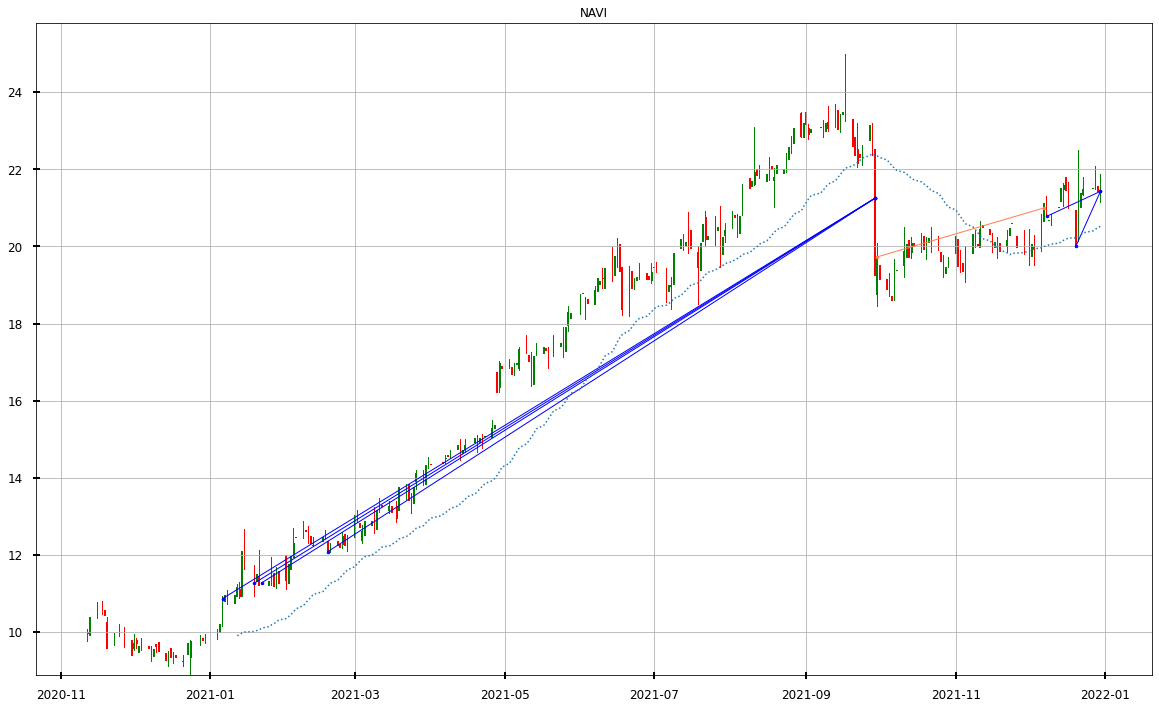

Прибыль 23778.16


,Id,Ticker,Sector,Direct,Lot,Size/money_unit,Date/price_open,Date/price_close,Criterion,Profit,ATR,N,SMA,MI,%BB
2021-01-06,0.01,NAVI,financial,Long,1,{416.0: 4521.92},{2021-01-06: 10.87},{2021-09-29: 21.25},min of 10,4318.08,0.437575,0.4418,9.795,38.841089,1.065436
2021-01-19,0.02,NAVI,financial,Long,1,{384.0: 4327.68},{2021-01-19: 11.27},{2021-09-29: 21.25},min of 10,3832.32,0.614561,0.46,10.0155,40.036185,0.954823
2021-01-22,0.03,NAVI,financial,Long,1,{728.0: 8211.84},{2021-01-22: 11.28},{2021-09-29: 21.25},min of 10,7258.16,0.638455,0.4859,10.1045,40.735693,0.898752
2021-02-18,0.04,NAVI,financial,Long,1,{900.0: 10881.0},{2021-02-18: 12.09},{2021-09-29: 21.25},min of 10,8244.0,0.497288,0.5481,11.198,41.003336,0.814158
2021-09-30,0.05,NAVI,financial,Short,1,{136.0: 2683.28},{2021-09-30: 19.73},{2021-12-07: 21.0},min of 10,-172.72,1.156559,0.7391,22.34975,40.947029,0.136419
2021-12-08,0.06,NAVI,financial,Long,1,{140.0: 2909.2},{2021-12-08: 20.78},{2021-12-30: 21.43},out of per,91.0,0.682517,0.6835,20.0175,38.132817,0.588832
2021-12-20,0.07,NAVI,financial,Long,1,{146.0: 2921.46},{2021-12-20: 20.01},{2021-12-30: 21.43},out of per,207.32,0.776018,0.6832,20.2205,39.519712,0.463881


In [154]:
def one_stock_chart(data_pos_test, ticker):
    date_from = datetime.date(2021, 1, 1)
    date_to = datetime.date(2021, 12, 30)
    candlestick(stocks_dict_full_csv_big, data_pos_test, ticker, date_from, date_to)
    display(data_pos_test.query('Ticker == @ticker and @date_from<index<@date_to'))
# display(data_pos_test)
# data_pos_test = data_pos_test.query('Direct == "Short"')
one_stock_chart(data_pos_test, 'NAVI')
# one_stock_chart(data_pos_test4, 'FOE')
# date_from = datetime.date(2019, 2, 1)
# date_to = datetime.date(2019, 8, 30)
# display(stocks_dict_full_csv_big['MDLZ'].loc[date_from:date_to, :].head(30))
# display(data_pos_test1)

## Анализ

Criterion
min of 10     2879
out of per     514
Name: Criterion, dtype: int64

,Pr_count,Loss_count,Max_pr,Max_loss,Max_loss_count,Max_drawdown,Short_pr,Short_count,Long_pr,Long_count,Open_pos
0,1133,2260,4318.08,-1530.08,NaN,-2443.56,NaN,NaN,NaN,NaN,NaN


Уникальных инструментов: 444
Прибыль по всем позициям: -462
Максимальная позиция: 24997.19
---------------------------------------------
Убыточных сделок подряд: 20
Максимальная просадка: -2443.56
---------------------------------------------
Прибыль/кол-во по коротким позициям: 0/0
Прибыль/кол-во по длинным позициям: 0/0
---------------------------------------------
Суммарно убыточных сделок: -213863.0
Суммарно прибыльных сделок: 213401.0
Оборот: 5171365
---------------------------------------------


None

,ticker,sum_profit,count_all,min,max,mean,median
76,CCXI,11313.10,12,-215.60,4098.60,942.758333,-29.90
260,NAVI,9029.84,7,-172.72,4318.08,1289.977143,1111.50
379,TCS,7934.86,9,-73.26,2314.08,881.651111,23.52
223,LPL,6698.76,10,-678.00,3041.52,669.876000,604.32
142,F,4352.16,10,-317.30,2060.80,435.216000,165.60
...,...,...,...,...,...,...,...
183,HST,-2383.26,12,-569.40,291.84,-198.605000,-203.48
371,SWN,-2716.40,9,-972.08,1054.68,-301.822222,-518.00
133,ETRN,-2746.24,11,-583.20,463.24,-249.658182,-350.40
231,MBT,-4451.96,9,-1206.58,1115.52,-494.662222,-622.88


                Id
count  3393.000000
mean     16.970000
std       9.796191
min       0.010000
25%       8.490000
50%      16.970000
75%      25.450000
max      33.930000


,Profit
Ticker,
CCXI,11313.10
NAVI,9029.84
TCS,7934.86
LPL,6698.76
F,4352.16
M,3475.28
EVH,3399.62
MAA,2683.92
WIRE,2652.48


,Profit
Ticker,
MDLZ,-1650.40
MANU,-1771.62
LUMN,-1796.48
CLF,-2027.74
KDP,-2103.88
HST,-2383.26
SWN,-2716.40
ETRN,-2746.24
MBT,-4451.96


,Profit
Sector,
consumer,-737.04
energy,-7794.24
financial,18098.24
green_buildings,337.40
health_care,9968.90
industrials,-7310.44
it,3177.74
materials,-2797.06
real_estate,1017.66


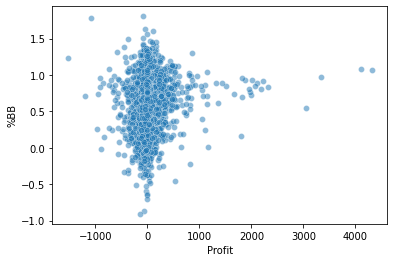

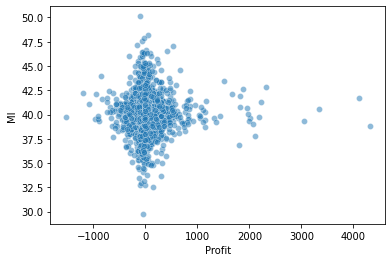

In [166]:
# Считает какие сделки были открыты в определенный период времени. 
# Удобно когда нужно понять почему не открылись те или иные сделки
# start = datetime.date(1997, 10, 29) # date - timedelta(days=mmd_period)
# end = datetime.date(1998, 4, 29) # date - timedelta(days=1)i
# display(data_pos_test.loc[start:end, :])

# display(data_pos_test3.pivot_table(index=['Sector'], columns=['Criterion'], values='Profit', aggfunc='sum'))
def sum_analytics(data_pos_test):
    data_pos_pivot_test = analytics_v2(data_pos_test) 
    print(data_pos_test.describe())
    profile_test(data_pos_test)
    data_pos_test.sort_values(by='Profit').tail(15)
    analysis_one_stock('IDCC', data_pos_test, data_pos_pivot_test, stocks_dict_full_csv_big)
sum_analytics(data_pos_test4)

# Функции исл.

## analytics_v2

In [3]:
# %run tinkoff_connection.ipynb
def analytics_v2(data_pos):
    """ Функция выводит аналитику по полученным сделкам и вычисляет profit_ticker и loss_tickers"""
    # %run tinkoff_connection.ipynb
#     data_pos = data_pos.query('0.05<N<1')
#     data_pos = data_pos[data_pos['CSMA'] <= 6]
#     data_pos = data_pos[data_pos['MBs'] <= 100]
    # ДФ сделок  
#     print(data_pos)
    data_profit = data_pos[data_pos.loc[:, 'Profit'] > 0]
    data_loss = data_pos[data_pos.loc[:, 'Profit'] < 0]
    display(data_pos.groupby(by='Criterion')['Criterion'].count())
    
    # Суммарно по сдлекам
    display(create_analytical(data_pos)) 
    # Сводная таблица по тикерам и их доходностью
    data_pos_pivot = data_pos.pivot_table(index='Ticker', values=['Profit'], aggfunc=['sum', 'count', 'min', 'max', 'mean',
                                                                                      'median']).reset_index()
#                                             by='max')
    data_pos_pivot.columns = ['ticker','sum_profit', 'count_all', 'min', 'max', 'mean', 'median']
    data_pos_pivot = data_pos_pivot.sort_values(by='max')
    data_pos_pivot = data_pos_pivot.sort_values(by='sum_profit', ascending=False)#.reset_index(drop=True)
    # Тикеры самых прибыльных и убыточных акций 
    pivot_profit_tickers = data_pos_pivot.head(5) # Топ 5 прибыльных акций
    pivot_loss_tickers = data_pos_pivot.tail(10) # Топ 5 убыточных акций
    # sort_values(by='sum')
    display(data_pos_pivot) # Сводная таблица по всем тикерам и открытым по ним сделкам
    # График корреляции 
#     display(loss_tickers.style.background_gradient(cmap='coolwarm'))

    
    return data_pos_pivot


# display(round(data_pos_pivot_test.describe(), 2)) # Описание столбцов

## analysis_one_stock

In [4]:
def analysis_one_stock(ticker, 
                       data_pos,
                       data_pos_pivot, # Сводная таблица по позициям каждого тикера
                       stocks_dict_full):
    """ Функция выводит scatterplot график """
#     data_pos = data_pos[data_pos['CSMA'] <= 6]
#     data_pos = data_pos[data_pos['MBs'] <= 100] 
    PL_index = data_pos_pivot.index # Тикеры переданных акций
#     print('Тикеры открытых позиций', data_pos_pivot.index)
    stock_quotes = stocks_dict_full[ticker] # Датафрейм котировок акции
    
    one_stock_pos_index = data_pos[data_pos.loc[:, 'Ticker']==ticker].index # Числа, когда были открыты сделки
#### Индексы профитовых и убыточных сделок
    stock_profit_index = data_pos.query("Ticker==@ticker and Profit>0").index
    stock_loss_index = data_pos.query("Ticker==@ticker and Profit<0").index
#### ДФ котировок открытых позиций 
    stock_quotes = stocks_dict_full[ticker] 
    profit_quotes = stocks_dict_full[ticker].loc[stock_profit_index] # Котировки прибыльных
    loss_quotes = stocks_dict_full[ticker].loc[stock_loss_index] # Котировки убыточных
#     display('Котировки прибыльных сделок', profit_quotes)
    
#     one_stock_quotes_pos = stocks_dict_full[ticker].loc[one_stock_pos_index] # Котировки по открытым позициям
    ticker_pos = data_pos[data_pos['Ticker'] == ticker]#.sort_values(by='Profit', ascending=False) # ДФ открытых сделок
#     display(data_pos[data_pos.loc[:,'Ticker'] == ticker].sort_index().head(20))
    
####     ГРАФИКИ
#     atr_f = atr_f.dropna(subset=['N']) # Котировки по акции, кроме первых там где рассчитывается ATR
#     sns.histplot(atr_f['ATR'], bins=100)
    plt.show()
#     sns.scatterplot(y='N', x='ATR', data=profit_quotes, alpha=1) # Рапределение ATR прибыльных сделок (СИНИЕ)
#     sns.scatterplot(y='N', x='ATR', data=loss_quotes, alpha=0.8) #Рапределение ATR убыточных сделок (ЖЕЛТЫЕ)
#     data_pos['corr'] = data['Date/price_close']
    
#     sns.scatterplot(y='CSMA', x='Profit', data=data_pos, alpha=0.5) #График по открытым сделкам
#     plt.show()
    sns.scatterplot(y='%BB', x='Profit', data=data_pos, alpha=0.5) #График по открытым сделкам
    plt.show()
    sns.scatterplot(y='MI', x='Profit', data=data_pos, alpha=0.5) #График по открытым сделкам
    plt.show()
#     sns.scatterplot(y='PVn', x='Profit', data=data_pos, alpha=0.5) #График по открытым сделкам
#     plt.show()
#     sns.scatterplot(y='MBl', x='Profit', data=data_pos, alpha=0.5) #График по открытым сделкам
# #     sns.scatterplot(y='MBs', x='Profit', data=data_pos, alpha=0.5) #График по открытым сделкам
#     plt.show()
#     sns.scatterplot(y='MBs', x='Profit', data=data_pos, alpha=0.5) #График по открытым сделкам
# #     sns.scatterplot(y='MBs', x='Profit', data=data_pos, alpha=0.5) #График по открытым сделкам
#     plt.show()
####    # Корреляция
#     display(data_pos.reset_index(drop=True).style.background_gradient(cmap='coolwarm'))
# data_pos_pivot_test = analytics_v2(data_pos_test) 


# analysis_one_stock('NAVI', data_pos_test, data_pos_pivot_test, stocks_dict_full)
# analysis_one_stock('AAPL', data_pos_test1, data_pos_pivot_test, stocks_dict_full)

## profile_test

In [5]:
def  sample_pos(data_pos):
    """ Функция выбирает максимально прибылье сделки и выборка наиболее прибыльных акций, аналогично наоборот для убыточных"""
    data_max_profit = data_pos.sort_values(ascending=False, by='Profit').head(250) # Прибыльные сделки
    pivot_max_profit = data_pos_pivot.head(30) # Сводная таблица по прибыльным сделкам
    data_max_loss = data_pos.sort_values(ascending=True, by='Profit').head(250) # Прибыльные сделки
    pivot_max_loss = data_pos_pivot.tail(30) # Сводная таблица по убыточным сделкам
    
    return (data_max_loss)
    
# sample_pos(data_pos_test)

def profile_test(data_pos_test):
    """ Функция показывает какие отрасли прибыльнее всего"""
    ticker_pivot = data_pos_test.pivot_table(index=['Ticker'], values='Profit', aggfunc='sum').sort_values(by='Profit', ascending=False)
    sector_criterion_pivot = data_pos_test.pivot_table(index=['Sector'], values='Profit', aggfunc='sum')#.sort_values(by='Profit', ascending=False)
    close_type_pivot = data_pos_test.pivot_table(index='Criterion', values='Profit', aggfunc='count')#.sort_values(by='Profit', ascending=False)
    
    display(ticker_pivot.head(10))
    display(ticker_pivot.tail(10))
    display(sector_criterion_pivot)
#     display(close_type_pivot)
    

# profile_test(data_pos_test)
# cProfile.run('profile_test()', sort='cumtime')

## candlestick

In [6]:
%run tinkoff_connection.ipynb
date_from = datetime.date(2021, 3, 1)
date_to = datetime.date(2021, 10, 20)
def candlestick(stocks_dict, data_pos, ticker, date_from, date_to):
    """Функция показывает на графике открытые сделки. 
       Интервал корректного отображения графика - 4 месяца"""
    start = date_from - timedelta(days=50)
    end = date_to + timedelta(days=30)
    quotes = stocks_dict[ticker].loc[start:end,:] # Котировки акции за период
    
    # Добавляем индикатор для отрисовки на графике
#     for i in stocks_dict.keys(): 
    quotes,gabage = BB(quotes)
    
    one_stock_pos = data_pos[data_pos.loc[:, 'Ticker'] == ticker ].loc[date_from:date_to,:].sort_index() # Сделки по определенной акции за период
    t = quotes['Date']
    o = quotes["Open"]
    h = quotes["High"]
    l = quotes["Low"]
    c = quotes["Close"]
    ind = quotes['SMA']
    
    plt.figure(figsize=(20,12))
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.7, color=color)
    plt.bar(x=t, height=h-l, bottom=l, width=0.2, color=color)
    
    for id_pos in list(one_stock_pos['Id']): #Рисуем сделоки
        date_open = list(one_stock_pos.loc[one_stock_pos['Id'] == id_pos, 'Date/price_open'].keys())[0]
#     for date_open in one_stock_pos.index: # date_open - дата входа
        date_close = list(one_stock_pos.loc[date_open, 'Date/price_close'].keys())[0]
    
        coor_pointer_y_out = list(one_stock_pos.loc[date_open, 'Date/price_close'].values())[0] # Куда указывает стрелка
        coor_pointer_y_in = list(one_stock_pos.loc[date_open, 'Date/price_open'].values())[0] # Координата по Х это длина графика минус 1
        
        color = 'blue' if one_stock_pos.loc[one_stock_pos['Id'] == id_pos, 'Direct'][0] == 'Long' else 'coral'
#         print(one_stock_pos.loc[one_stock_pos['Id'] == id_pos, 'Profit'][0])
        plt.plot([date_open, date_close], [coor_pointer_y_in, coor_pointer_y_out], 
                 color=color, marker='.',  linewidth=1, markersize=5)
        
    plt.grid(visible=True)
#  Настраиваем вид основных тиков:
    plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
                   which = 'major',    #  Применяем параметры к основным делениям
                   direction = 'inout',    #  Рисуем деления внутри и снаружи графика
                   length = 7,    #  Длинна делений
                   width = 2,     #  Ширина делений
                   pad = 10,    #  Расстояние между черточкой и ее подписью
                   labelsize = 12)    #  Размер подписи
    
#     for date in t:
    plt.plot(t, ind, ls=':', pickradius=5) # Рисуем точку на графике
#     print(stocks_dict_full_csv_big[ticker])
    plt.rcParams['axes.facecolor'] = 'white'
    plt.title(ticker)
    plt.show()
    print("Прибыль", round(one_stock_pos['Profit'].sum(), 2))
#     display(data_pos.query("Ticker==@ticker and @date_from<=index<=@date_to"))
        
# candlestick(stocks_dict_full_csv_big, data_pos_test3, 'NAVI', date_from, date_to)
        

18537


In [7]:
# date_from = datetime.date(2021, 9, 1)
# date_to = datetime.date(2021, 10, 22)
# candlestick(stocks_dict_full_csv_big, data_pos_test, 'NAVI', date_from, date_to)
# display(stocks_dict_full_csv_big['NAVI'].query(' @date_from<=index<=@date_to'))
# data_pos_testa.query('Ticker == "NAVI"')

## Непрерывность котировок

In [8]:
%%time
date_from = datetime.date(2000, 1, 1)
date_to = datetime.date(2021, 12, 31)
dataaa = stocks_dict_full_csv_big['CERN'].loc[date_from:date_to, :]

def continuity_time_series(data):
    """ Функция проверяет непрерывность временного ряда, и отдает максимальную разницу в днях между соседними свечами"""
    date_array = np.array(data.index)
    diff_num = list(map(lambda x: x.days, np.diff(date_array))) # список с разностью соседних котировок
    try:
        return max(diff_num)
    except:
        pass
    
miss_list = []
data_miss = pd.DataFrame(columns=['Ticker', 'Count'])
for ticker in stocks_dict_full_csv_big.keys():
    row = {'Ticker':ticker, 'Count':continuity_time_series(stocks_dict_full_csv_big[ticker])}
#     miss_list.append(value)
    data_miss = pd.concat([data_miss, pd.DataFrame([row])], ignore_index=True)
 
data_miss = data_miss.sort_values(by="Count", ascending=False).query('Count < 15')
list_miss = list(data_miss['Ticker'])

stocks_dict_full_csv_big = {k:v for k,v in stocks_dict_full_csv_big.items() if k in list_miss }
sorted(list(stocks_dict_full_csv_big.keys())) == sorted(list_miss) # Проверка, что все акции с большими пропусками дропнуты

NameError: name 'stocks_dict_full_csv_big' is not defined

In [9]:
del list_miss
del data_miss

NameError: name 'list_miss' is not defined

## stat_research

In [ ]:
def stat_research (data_column):
    """Функция проводит исследование статистики по временному ряду и рисует графики"""
    row =  [u'JB', u'p-value', u'skew', u'kurtosis']
    jb_test = sm.stats.stattools.jarque_bera(data_column)
    a = np.vstack([jb_test])
    itog = SimpleTable(a, row)
    print (itog)
    
    # stocks_dict_full_csv_big['PEG']['Low'].head(5).plot(figsize=(18,20))
    #stocks_dict_full_csv_big['PEG']['High'].head(5).plot(figsize=(18,20))
    
# stat_research (stocks_dict_full_csv_big['PEG']['High'])

In [ ]:
 def chart_time_profit(data_pos, x_ax, y_ax):
    """Функция рисуе график зависимости прибыльности от времени"""
    sns.scatterplot(x=x_ax, y=y_ax, data=data_pos, alpha=0.5) #График по открытым сделкам
    


Вывод:
    Чем выше ATR тем меньше сделок с большим профитом.
    
Надо проверить зависимость N-Profit - Если поставить порог на N, то профит увеличивается
Больше всего закрывается по стоп-лоссам. Почти в 10 раз чаще чем все остальные
Слишком малые N Дают слишком большие позиции, а слишком большие N дают много лишних срабатываний. Возможно интересное условие 0.1 < N <1. Это условие хорошее для рынка в узком диапазоне консолидации

# Гипотезы и проверки


Гипотеза: Выход из узкой полосы консолидации имеет хорошее соотношение риск/профит.
Проверка, при увеличении показателя (модуль(минимум периода - максимум периода)/среднее последних 3 дней) уменьшает вероятность прибыли.
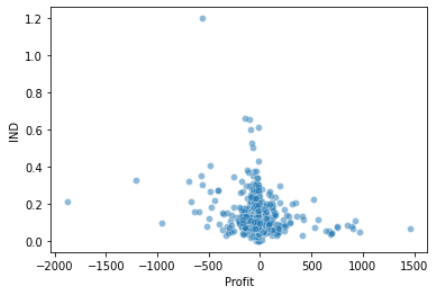

Увеличить стоплосс, и посмотреть на сколько увеличится прибыль по прибыльным позициям, то есть без учета убыточных, так как это будет имитация покупкой или продажей опциона. + вычесть премии за опционы (нужно рассчитать)
1. Стоп-лосс = 1, dev_max_long =4, min_max_period = 10 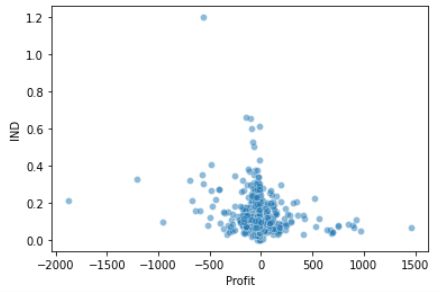
2. Стоп-лосс = 6, dev_max_long =4, min_max_period = 10  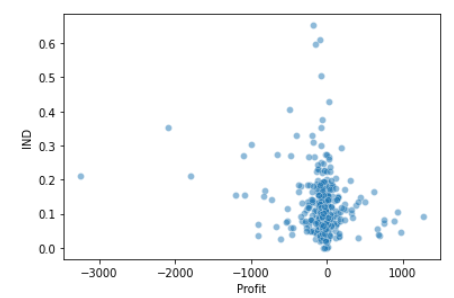

Изучить влияние стоп лоссов и закрытия по минимуму на доходность. Собрать сводную таблицу по потерям.
Промежуточный вывод: При угадывании общего направления тренда большие стоп лоссы, отклонения от максимума (N) не спасают при важном переходе через среднюю. В то время как замена period_min_max на казание средней заметно улучшило ситуацию. 

1. Проверить что будет, если выходить только на стоп лоссах и касаниях средней, без учета 2N. Стало лучше.

2. Рассмотреть корреляцию цены акции и прибыльности прорыва. Гипотеза: дешевые акции имеют больше ложных прорывов. 
Видимо наоборот. Дорогие акции имеют больше ложных прорывов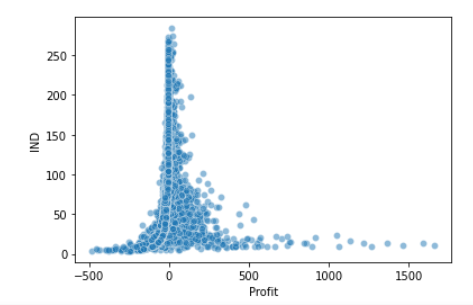

Гипотеза: Модуль разницы (high-low)/close влияет на прибыльность сделки, так как это косвенный показатель высокой волатильности.
Вывод: Похоже на то, хотя и неявно

Гипотеза: Чем больше период прорыва, тем больше вероятность получения прибыли.
Вывод: Похоже что так

In [ ]:
Гипотеза: Если недавно было 2 пересечения средней, то скорее всего сделка будет убыточной

# Профилирование кода

In [ ]:
#!/usr/bin/env python
import psutil
# gives a single float value
psutil.cpu_percent()
# gives an object with many fields
psutil.virtual_memory()
# you can convert that object to a dictionary 
dict(psutil.virtual_memory()._asdict())

In [ ]:
# %run tinkoff_connection.ipynb
# def profile_test():
#     profits_all = {}
#     sl = 0
#     # year_from = 1997
#     # stocks_list, stocks_dict_full = shuffle_dict(stocks_dict_full_csv, 200)
#     for i in range(0, 1, 1):
#         stocks_list, stocks_dict_full = shuffle_dict(stocks_dict_full_csv, 0, 20)
#         warnings.filterwarnings("ignore")
#         data_pos, profit = open_turtles(
#                                         usd_stocks, 
#                                         stocks_list,
#                                         stocks_dict_full_csv,
#                                         deposit = 10000,
#                                         interval_start = 0,  
#                                         interval_end = 20,
#                                         corr_stop_loss = 2,
#                                         corr_unit_size = 1, 
#                                         add_corr_N = 1,
#                                         count_direct = 13,
#                                         count_sector = 6,
#                                         count_all = 20, 
#                                         dev_max_long = 2,
#                                         min_max_period = 10,
#                                         delta_N_add = 0.5,
#                                         year_from = 2020)
#         data_pos_pivot = analytics_v2(data_pos)
#         display(round(data_pos_pivot.describe(), 2))
#         all_profits_2.append(round(profit,2))
#         return data_pos
# # test = profile_test()
# # cProfile.run('profile_test()', sort='cumtime')

In [ ]:
# data = [[1,2,3,4], [5,6,7,8], [9, 10, 11, 12]]
# df = pd.DataFrame(columns=['a', 'b', 'c', 'd'], data=data)


In [ ]:
# %%time

# def foo():
#     aa = 0
#     bb = 0
#     for i in range(0, 10000):
#         aa +=1
#         bb +=1
# #         array = np.array([aa,bb])
#         df.loc[df['a'] == 5, 'c'] = aa
#         df.loc[df['a'] == 5, 'b'] = bb
#     display(df)
# foo()
# # cProfile.run('foo()', sort='cumtime')

In [ ]:
# ASCII_BITS = 8
# def to_bin(c):
#     """ Функция кодирует строку в двоичный код"""
#     return bin(ord(c))[2:].zfill(ASCII_BITS)
# def bins_str(text):
#     """ Функция переводит двоичный код в десятичный"""
#     bin_str = ''.join(to_bin(c) for c in text) # Строка в бинарном представлении
#     return int(bin_str, 2) # Бинарное число переводится в десятичное
# print(bins_str('1'))